# Video Game Speedruns

# Introduction

An interest of mine and something I've been keeping eyes on for around 8 years is the speedrunning communities within video games. Around 2014, I discovered a live speedrunning marathon called "Games Done Quick" and have been watching it biannually ever since, and have since picked up a few games to speedrun for fun.

Speedrunning, in its most basic form, is the hobby of playing a game over and over and trying to complete it as quickly as possible. Quick strategies are utilized by players to navigate levels quickly and skillfully, with glitches being included when possible. Most games have a small niche community of players who enjoy speedrunning it, but some games are vastly more popular than others to speedrun. In this project, I wanted to look at what those games were and if I could find some common characteristics between the most popular of speed games, solely looking at game development and game sales data.

# Questions

The questions that I would like to solve within this project are:

<ul>
    <li>What are the most popular games to speedrun?</li>
    <li>Does the number of sales correlate to the popularity of the speedrun of a game?</li>
    <li>Does the company that published the game correlate to speedrunning popularity?</li>
</ul>

## The Data 

The data I'm using within this project are two different datasets found from Kaggle.

The first is a csv file with generic game data that gives me data such as the game name, and total runs. This dataset can be found <a href="https://www.kaggle.com/datasets/matheusturatti/game-speedrun-records?resource=download&select=game_data_.csv">here.</a>

The second data file is a csv the includes video game sales data and it includes the publishing company, as well as sales numbers from different regions of the world, as well as worldwide. This data can be found <a href="https://www.kaggle.com/datasets/ashaheedq/video-games-sales-2019">here.</a>


In [1]:
import pandas as pd
import numpy as np

In [2]:
speedruns_df = pd.read_csv("game_data_.csv")

In [3]:
speedruns_df

,Game_Id,Abbreviation,Name,Genres,Platforms,Total_Runs,Release_Date
0,0,sm64,Super Mario 64,3D Platformer,"Nintendo 64, Wii Virtual Console, Wii U Virtua...",9174.0,1996-06-23
1,1,mc,Minecraft: Java Edition,Sandbox,PC,6869.0,2011-11-18
2,2,smo,Super Mario Odyssey,3D Platformer,Switch,4284.0,2017-10-27
3,3,celeste,Celeste,2D Platformer,"PlayStation 4, Xbox One, PC, Switch, Xbox One ...",3815.0,2018-01-25
4,4,mk8dx,Mario Kart 8 Deluxe,Racing,Switch,7660.0,2017-04-28
...,...,...,...,...,...,...,...
996,996,swbf,Star Wars: Battlefront (2004),First-person shooter,"PlayStation 2, Xbox, PC",91.0,2005-01-01
997,997,sonic_generations,Sonic Generations,2D Platformer,"PlayStation 3, Xbox 360, Xbox One, PC, Xbox Se...",97.0,2004-09-20
998,998,swyds,Shower With Your Dad Simulator,Misc,PC,138.0,2011-11-01
999,999,tabs,Totally Accurate Battle Simulator,Strategy,"Xbox One, PC, Macintosh, Switch",116.0,2015-09-02


In [4]:
videogame_sales_df = pd.read_csv("vgsales-12-4-2019.csv")

In [5]:
videogame_sales_df

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55787,55788,Indivisible,indivisible,Role-Playing,NaN,PC,505 Games,Lab Zero Games,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224682/indivisibl...,1,NaN,/games/boxart/full_6339426AmericaFrontccc.jpg
55788,55789,Lost Ember,lost-amber,Adventure,RP,PC,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/games/game.php?id=2246...,1,NaN,/games/boxart/full_8893129AmericaFrontccc.jpg
55789,55790,Lost Ember,lost-amber,Adventure,RP,PS4,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224690/lost-ember...,1,NaN,/games/boxart/full_6514293AmericaFrontccc.jpg
55790,55791,Lost Ember,lost-amber,Adventure,RP,XOne,Mooneye Studios,Mooneye Studios,NaN,NaN,...,NaN,NaN,NaN,NaN,2019.0,11th Apr 19,http://www.vgchartz.com/game/224688/lost-ember...,1,NaN,/games/boxart/full_6799693AmericaFrontccc.jpg


## Pre-Processing the Data

Now, to begin my pre-processing, I'm first going to go through the two data frames I've created with the two csv files I've downloaded and will remove the columns that will be unneccesary to my visualizations. They hold good data, but it's just it's not useful to my future plots and graphs and I don't want to keep around data I don't need. 

For the speedrun dataframe, this includes removing the game_id, abbreviation, platforms, genres, and release_date. 

For the video game sales dataframe, this includes removing everything that isn't the game name, publisher, and global sales. The global_sales column covers all of those sales so I just need to keep the total instead of adding the other regions together.

In [6]:
speedruns_cleaned_df = speedruns_df.drop(['Game_Id', 'Abbreviation', 'Platforms', 'Genres', 'Release_Date'], axis=1)
speedruns_cleaned_df

,Name,Total_Runs
0,Super Mario 64,9174.0
1,Minecraft: Java Edition,6869.0
2,Super Mario Odyssey,4284.0
3,Celeste,3815.0
4,Mario Kart 8 Deluxe,7660.0
...,...,...
996,Star Wars: Battlefront (2004),91.0
997,Sonic Generations,97.0
998,Shower With Your Dad Simulator,138.0
999,Totally Accurate Battle Simulator,116.0


In [7]:
#removing everything but name, publisher, developer, total_shipped and global_sales
videogame_sales_cleaned_df = videogame_sales_df.drop(['Rank', 'basename', 'Genre', 'ESRB_Rating', 'Platform', 'Developer', 'VGChartz_Score', 'Critic_Score', 'User_Score', 'NA_Sales', 'PAL_Sales', 'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'url', 'status', 'Vgchartzscore', 'img_url'], axis=1)
videogame_sales_cleaned_df

,Name,Publisher,Total_Shipped,Global_Sales
0,Wii Sports,Nintendo,82.86,NaN
1,Super Mario Bros.,Nintendo,40.24,NaN
2,Mario Kart Wii,Nintendo,37.14,NaN
3,PlayerUnknown's Battlegrounds,PUBG Corporation,36.60,NaN
4,Wii Sports Resort,Nintendo,33.09,NaN
...,...,...,...,...
55787,Indivisible,505 Games,NaN,NaN
55788,Lost Ember,Mooneye Studios,NaN,NaN
55789,Lost Ember,Mooneye Studios,NaN,NaN
55790,Lost Ember,Mooneye Studios,NaN,NaN


In [8]:
videogame_sales_cleaned_df.isna().sum()

Name                 0
Publisher            0
Total_Shipped    53965
Global_Sales     36377
dtype: int64

I've noticed with this dataset the total sales are either in the total_shipped column or global_sales column, so I'm going to combine them into one column called global_sales for simplicity.

In [9]:
videogame_sales_cleaned_df['Global_Sales'] = videogame_sales_cleaned_df['Global_Sales'].fillna(videogame_sales_cleaned_df['Total_Shipped'])

In [10]:
videogame_sales_cleaned_df.head(15)

,Name,Publisher,Total_Shipped,Global_Sales
0,Wii Sports,Nintendo,82.86,82.86
1,Super Mario Bros.,Nintendo,40.24,40.24
2,Mario Kart Wii,Nintendo,37.14,37.14
3,PlayerUnknown's Battlegrounds,PUBG Corporation,36.60,36.60
4,Wii Sports Resort,Nintendo,33.09,33.09
5,Pokemon Red / Green / Blue Version,Nintendo,31.38,31.38
6,New Super Mario Bros.,Nintendo,30.80,30.80
7,Tetris,Nintendo,30.26,30.26
8,New Super Mario Bros. Wii,Nintendo,30.22,30.22
9,Minecraft,Mojang,30.01,30.01


In [11]:
#then dropping the total_shipped because it's redundant
videogame_sales_cleaned_df = videogame_sales_cleaned_df.drop(['Total_Shipped'], axis=1)

In [12]:
videogame_sales_cleaned_df

,Name,Publisher,Global_Sales
0,Wii Sports,Nintendo,82.86
1,Super Mario Bros.,Nintendo,40.24
2,Mario Kart Wii,Nintendo,37.14
3,PlayerUnknown's Battlegrounds,PUBG Corporation,36.60
4,Wii Sports Resort,Nintendo,33.09
...,...,...,...
55787,Indivisible,505 Games,NaN
55788,Lost Ember,Mooneye Studios,NaN
55789,Lost Ember,Mooneye Studios,NaN
55790,Lost Ember,Mooneye Studios,NaN


I've noticed just glancing through the data on kaggle some titles are repeated due to having multiple platforms (example below with Minecraft), so I'm just going to merge them into one and combine their sales. I'm also going to keep the top sales Publisher as other platform releases can be done by third parties.

In [13]:
videogame_sales_cleaned_df[videogame_sales_cleaned_df['Name'] == 'Minecraft']

,Name,Publisher,Global_Sales
9,Minecraft,Mojang,30.01
56,Minecraft,Microsoft Studios,13.00
166,Minecraft,Sony Computer Entertainment,6.33
175,Minecraft,Sony Computer Entertainment America,6.05
211,Minecraft,Microsoft Studios,5.43
750,Minecraft,Sony Computer Entertainment America,2.47
1088,Minecraft,Mojang,1.89
1528,Minecraft,Mojang,1.47
5799,Minecraft,Nintendo,0.37
37975,Minecraft,Mojang,NaN


In [14]:
#creating a new dataframe to drop publisher then add the sales together for games
videogame_sales_globalsales_df = videogame_sales_cleaned_df.drop('Publisher', axis=1)
videogame_sales_globalsales_df

,Name,Global_Sales
0,Wii Sports,82.86
1,Super Mario Bros.,40.24
2,Mario Kart Wii,37.14
3,PlayerUnknown's Battlegrounds,36.60
4,Wii Sports Resort,33.09
...,...,...
55787,Indivisible,NaN
55788,Lost Ember,NaN
55789,Lost Ember,NaN
55790,Lost Ember,NaN


In [15]:
#videogame_sales_globalsales_df['Global_Sales'] = videogame_sales_globalsales_df['Global_Sales'].fillna(0)

In [16]:
#videogame_sales_globalsales_df

,Name,Global_Sales
0,Wii Sports,82.86
1,Super Mario Bros.,40.24
2,Mario Kart Wii,37.14
3,PlayerUnknown's Battlegrounds,36.60
4,Wii Sports Resort,33.09
...,...,...
55787,Indivisible,0.00
55788,Lost Ember,0.00
55789,Lost Ember,0.00
55790,Lost Ember,0.00


After filling the null values in Global Sales with a 0, I summed together the Global Sales by Name of each game. This dataframe will be useful for comparing 

In [16]:
videogame_sales_globalsales_df = videogame_sales_globalsales_df.groupby('Name').sum()
videogame_sales_globalsales_df.sort_values(by='Global_Sales', ascending=False).head(10)

,Global_Sales
Name,
Wii Sports,82.86
Grand Theft Auto V,76.89
Minecraft,67.02
Super Mario Bros.,40.24
PlayerUnknown's Battlegrounds,39.10
Mario Kart Wii,37.14
Tetris,35.84
Wii Sports Resort,33.09
Pokemon Red / Green / Blue Version,31.38


After removing unneccesary columns from the data sets, I wanted to combine the two data frames together to have just one to work with, which requires joining the frames together by game name. 

Before I do that though, I need to check for null rows any null data that could be problematic for the visualizations.

In [17]:
#checking speedruns df first
speedruns_cleaned_df.isna().sum()

Name          1
Total_Runs    1
dtype: int64

In [19]:
#checking what games have null runs
speedruns_cleaned_df[speedruns_cleaned_df['Total_Runs'].isna()]

,Name,Total_Runs
1000,NaN,NaN


In [20]:
#removing the empty row
speedruns_cleaned_df = speedruns_cleaned_df.dropna(axis=0)
speedruns_cleaned_df.isna().sum()

Name          0
Total_Runs    0
dtype: int64

In [21]:
#now onto video game sales
videogame_sales_cleaned_df.isna().sum()

Name                0
Publisher           0
Global_Sales    34550
dtype: int64

Now onto combining the data frames.

In [22]:
#first combining game name, sales, and publisher together with the new combined sales number.
#dropping sales off the original video game sales df to keep publisher and we'll recombine the sales together with the newer df
videogame_sales_cleaned_df = videogame_sales_cleaned_df.drop('Global_Sales', axis=1)
videogame_sales_cleaned_df

,Name,Publisher
0,Wii Sports,Nintendo
1,Super Mario Bros.,Nintendo
2,Mario Kart Wii,Nintendo
3,PlayerUnknown's Battlegrounds,PUBG Corporation
4,Wii Sports Resort,Nintendo
...,...,...
55787,Indivisible,505 Games
55788,Lost Ember,Mooneye Studios
55789,Lost Ember,Mooneye Studios
55790,Lost Ember,Mooneye Studios


In [23]:
#remove same names and keeping the first name with the top publisher
videogame_sales_cleaned_df = videogame_sales_cleaned_df.drop_duplicates(subset='Name', keep='first')
videogame_sales_cleaned_df

,Name,Publisher
0,Wii Sports,Nintendo
1,Super Mario Bros.,Nintendo
2,Mario Kart Wii,Nintendo
3,PlayerUnknown's Battlegrounds,PUBG Corporation
4,Wii Sports Resort,Nintendo
...,...,...
55778,Zoo Tycoon: Ultimate Animal Collection,Microsoft Studios
55782,Ion Maiden,3D Realms
55786,In the Valley of Gods,Campo Santo
55788,Lost Ember,Mooneye Studios


In [24]:
#now to merge global sales back with the game name + publisher
videogame_sales_cleaned_df = pd.merge(videogame_sales_cleaned_df, videogame_sales_globalsales_df, how="left", on=["Name"])

In [25]:
videogame_sales_cleaned_df.head(10)

,Name,Publisher,Global_Sales
0,Wii Sports,Nintendo,82.86
1,Super Mario Bros.,Nintendo,40.24
2,Mario Kart Wii,Nintendo,37.14
3,PlayerUnknown's Battlegrounds,PUBG Corporation,39.10
4,Wii Sports Resort,Nintendo,33.09
5,Pokemon Red / Green / Blue Version,Nintendo,31.38
6,New Super Mario Bros.,Nintendo,30.80
7,Tetris,Nintendo,35.84
8,New Super Mario Bros. Wii,Nintendo,30.22
9,Minecraft,Mojang,67.02


In [26]:
combined_df = pd.merge(speedruns_cleaned_df, videogame_sales_cleaned_df, how="left", on=["Name"])
combined_df.shape

(1000, 4)

In [27]:
combined_df.head(15)

,Name,Total_Runs,Publisher,Global_Sales
0,Super Mario 64,9174.0,Nintendo,11.91
1,Minecraft: Java Edition,6869.0,NaN,NaN
2,Super Mario Odyssey,4284.0,Nintendo,13.76
3,Celeste,3815.0,Matt Makes Games Inc.,0.00
4,Mario Kart 8 Deluxe,7660.0,Nintendo,15.02
5,Seterra,7763.0,NaN,NaN
6,Portal,3676.0,Valve Corporation,9.97
7,Super Metroid,2826.0,Nintendo,1.42
8,Getting Over It With Bennett Foddy,2561.0,NaN,NaN
9,"Super Mario Sunshine""Platformer",2575.0,NaN,NaN


In [28]:
combined_df.sort_values(by="Total_Runs", ascending=False).head(50).isna().sum()

Name             0
Total_Runs       0
Publisher       22
Global_Sales    22
dtype: int64

After combining the two data frames, it's clear that a lot of the games from the speedruns csv didn't match with games from the video game sales csv. This is either due to the sales csv not having the game or the name being different on speedrun.com.
Some of the games above that are popular on speedrun.com also are free games - like "Seterra" which is a website used to play geography quizzes, so that information will be missing. I am going to go out of my way to add a few missing values to the top 50 games here - like the sales number for Celeste, Super Mario Sunshine and Getting Over It With Bennett Foddy - as these nulls are the most important and I'd like the accurate number to reflect in my visualizations. I'm also going to insert Publisher where I can out of these 22 games for another visualization later. It's tedious, but it'll be worth it.

Unfortunately, some games will have to remain null as either they are free and don't have sales data, or the game version in particular doesn't have sales numbers.

In [29]:
combined_df_top25 = combined_df.sort_values(by="Total_Runs", ascending=False).head(25)

In [30]:
combined_df_top25

,Name,Total_Runs,Publisher,Global_Sales
0,Super Mario 64,9174.0,Nintendo,11.91
5,Seterra,7763.0,NaN,NaN
4,Mario Kart 8 Deluxe,7660.0,Nintendo,15.02
1,Minecraft: Java Edition,6869.0,NaN,NaN
10,ROBLOX: Speed Run 4,5086.0,NaN,NaN
2,Super Mario Odyssey,4284.0,Nintendo,13.76
19,ROBLOX: Piggy,4081.0,NaN,NaN
18,Pou,3930.0,"RealNetworks, Inc",0.00
3,Celeste,3815.0,Matt Makes Games Inc.,0.00
26,White Tiles 4: Piano Master 2,3755.0,NaN,NaN


In [31]:
#I'm filling what I can here by simply either knowing the publisher or doing a quick google search of publisher/sales
#Data was found just on wikipedia
combined_df_top25.at[1, 'Publisher'] = 'Mojang'
combined_df_top25.at[1, 'Global_Sales'] = 67.02
combined_df_top25.at[18, 'Global_Sales'] = np.nan
combined_df_top25.at[3, 'Global_Sales'] = 1.0
combined_df_top25.at[26, 'Publisher'] = 'Brighthouse'
combined_df_top25.at[22, 'Publisher'] = 'Mojang'
combined_df_top25.at[21, 'Publisher'] = 'Supergiant Games'
combined_df_top25.at[21, 'Global_Sales'] = 1.0
combined_df_top25.at[17, 'Publisher'] = 'Capcom'
combined_df_top25.at[17, 'Global_Sales'] = 10.0
combined_df_top25.at[9, 'Publisher'] = 'Nintendo'
combined_df_top25.at[9, 'Global_Sales'] = 5.5
combined_df_top25.at[8, 'Publisher'] = 'Bennett Foddy'
combined_df_top25.at[48, 'Publisher'] = 'Activision'
combined_df_top25.at[48, 'Global_Sales'] = 26.72
combined_df_top25.at[40, 'Publisher'] = 'Activision'
combined_df_top25.at[5, 'Publisher'] = 'Seterra'
combined_df_top25.at[10, 'Publisher'] = 'ROBLOX'
combined_df_top25.at[19, 'Publisher'] = 'ROBLOX'
combined_df_top25.at[30, 'Publisher'] = 'Hipster Whale'
combined_df_top25.at[29, 'Publisher'] = 'Draw Me A Pixel'

In [32]:
combined_df_top25

,Name,Total_Runs,Publisher,Global_Sales
0,Super Mario 64,9174.0,Nintendo,11.91
5,Seterra,7763.0,Seterra,NaN
4,Mario Kart 8 Deluxe,7660.0,Nintendo,15.02
1,Minecraft: Java Edition,6869.0,Mojang,67.02
10,ROBLOX: Speed Run 4,5086.0,ROBLOX,NaN
2,Super Mario Odyssey,4284.0,Nintendo,13.76
19,ROBLOX: Piggy,4081.0,ROBLOX,NaN
18,Pou,3930.0,"RealNetworks, Inc",NaN
3,Celeste,3815.0,Matt Makes Games Inc.,1.00
26,White Tiles 4: Piano Master 2,3755.0,Brighthouse,NaN


Lastly, I am grouping together the number of total runs per publisher for a visualization in the next section.

In [33]:
combined_df_top25 = combined_df_top25.groupby('Publisher').agg({'Total_Runs': 'sum'})
combined_df_top25 = combined_df_top25.reset_index()

Now the combined top 25 dataframe can be used later.

In [34]:
combined_df_top25

,Publisher,Total_Runs
0,Activision,4856.0
1,Bennett Foddy,2561.0
2,Brighthouse,3755.0
3,Capcom,2880.0
4,Draw Me A Pixel,2383.0
5,Hipster Whale,2615.0
6,Matt Makes Games Inc.,3815.0
7,Mojang,10033.0
8,Nintendo,38026.0
9,ROBLOX,9167.0


## Visualizations

Now, finally onto the visualizations to answer my questions.

Starting with question 1: What are the most popular games to speedrun?

To answer this question, I'm going to make a graph visualizing the top 25 speedgames on speedrun.com as of March 31st, as that is when this data was pulled.

In [35]:
import matplotlib.pyplot as plt

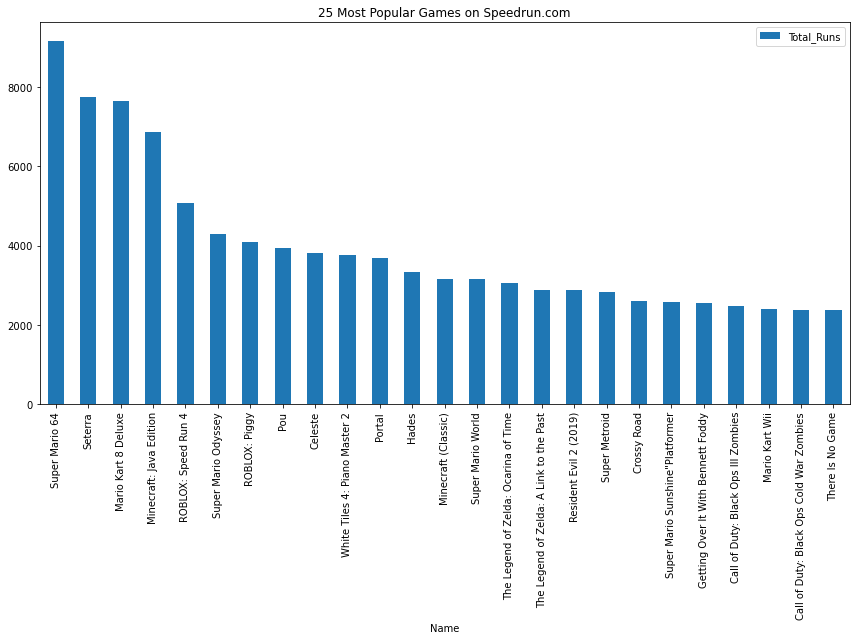

In [72]:
combined_df_top25_a = combined_df.sort_values(by="Total_Runs", ascending=False).head(25)
top25 = combined_df_top25_a.plot(x="Name", y="Total_Runs", kind="bar", figsize=(12,9), title="25 Most Popular Games on Speedrun.com")
fig25 = top25.get_figure()
fig25.tight_layout()
fig25.savefig('top25bar.png')

The graph shows the top 15 games that are most popular to speedrun as of March 31, 2022, determined by the total amount of runs submitted to the leaderboard. Super Mario 64 takes the top spot, with over 8000 total runs. Just from my personal knowledge, I know that Super Mario 64 was a high selling game made by Nintendo. Now it's time to discover if sales and publishers make a different on speedrun popularity. 

Onto my second question:

Does the number of sales correlate to the popularity of a game's speedrun?

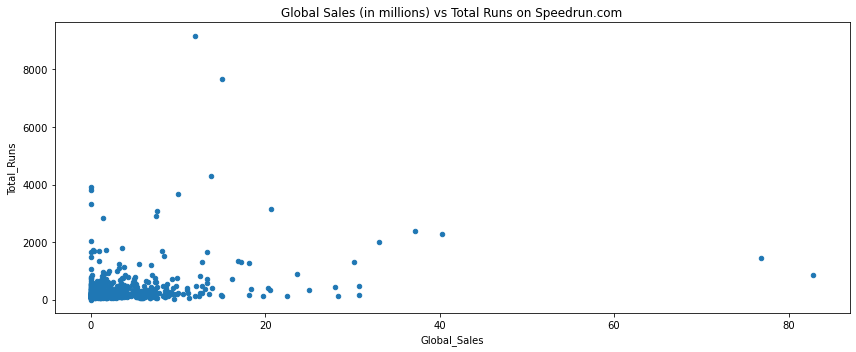

In [79]:
sales = combined_df.plot(x="Global_Sales", y="Total_Runs", kind="scatter", figsize=(12,5), title="Global Sales (in millions) vs Total Runs on Speedrun.com")
figsales = sales.get_figure()
figsales.tight_layout()
figsales.savefig('salesvsruns.png')

The scatterplot doesn't show much correlation between the two variables. There clearly are other factors weighing in to popular speedgames that aren't related to the global sales of a videogame. It's also worth noting that most games in the data don't have a lot of sales or a lot of runs. 

One of those other factors that I am curious to finding out is the publishing company of a video game, which leads into my third question: 

Does the company that published the game correlate to speedrunning popularity?

For this graph, I am averaging the total runs per game and grouping them with their respective publishers. To unclutter the graph, I am also going to only be selected from the top 25 games on speedrun.com (same games as in the first visual!), as there are just too many null values within the publisher column.

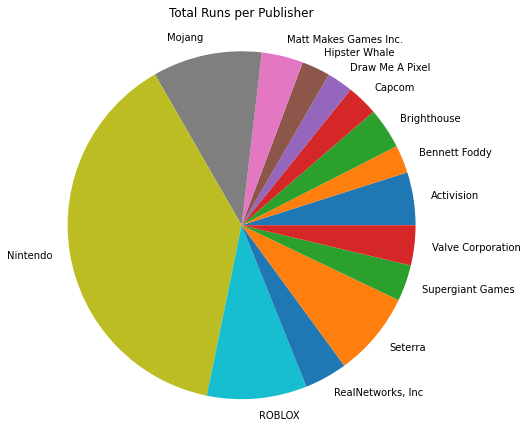

In [107]:
plt.pie(combined_df_top25['Total_Runs'], labels=combined_df_top25['Publisher'], radius=2)
plt.title('Total Runs per Publisher', pad=100)
plt.savefig('publisherpie.png', bbox_inches='tight')

As the pie chart shows on its own, Nintendo games are significantly more popular to speedrun than any other developer within the top 25 games on speedrun.com. In the top 25, this includes 9 games alone.

## Conclusion

Overall, I was able to answer my 3 questions and visualize them. I've found out what the top 25 most popular games on speedrun.com are (and found out some speedruns exist, like Seterra). I was interested to find out that there isn't a correlation between a game's sales and its speedrunning popularity. Exploring the different publishers of top speedgames didn't necessarily surprise me, as I usually enjoy watching Nintendo games being speedran but I was surprised by just the amount of games in the top 25 that were developed by an Indie studio/developer, like Bennett Foddy (Getting Over It With Bennett Foddy) or Supergiant Games (Hades).

I think an important takeaway from the data explored here is that there are many things that go into what makes a game popular for speedrunning, and while sales doesn't seem to be a factor, some developers seem to be better at creating popular speedruns than others, whether that's intentional or not. 

To be able to take this data and predict whether a future game would be successful in speedrunning would be a hard task, as it is missing a lot of the qualitative data of why people speedrun certain games over others. Perhaps with this kind of data and other quantitative data, like what types of game features are present in popular speedruns, developers could cater some of their features to promote a speedrunning community for their game.